# Aplicação médias móveis e filtros para decomposição de séries temporais

Séries temporais são tipos de dados que merecem um forma particular de análise e seus componentes precisão ser identificados e estudados. O objetivo de estudar séries temporais e criar modelo que permitam a previsão dos próximos dados do próximo mês, semestre, ano, década, etc., para que modelos sejam desenvolvidos é necessário estudar o passado e, nos dados que são observados em séries temporais, existem componentes importantes para analisar.

Os principais componentes de uma série temporal são:

1) a **tendência** : movimento de crescimento ou de decrescimento que ocorrem de forma sustentada;

2) **sazonalidade** : movimentos recorrentes e que ocorrem dentro de um ano.

3) **ciclo** : movimentos que ocorrem em períodos maiores de um ano;

4) **resíduos** : Após todos os componentes acima serem extraídos de uma série temporal, sobram valores que possuem comportamento aleatório e que não possuem uma explicação.


Existem algumas formas de extrair algumas forma de extrair essas informação e estarei utilizando elas nas etapas a seguir.

## Instalando a biblioteca *Statsmodels*

In [56]:
pip install statsmodels==0.12.1

     |████████████████████████████████| 9.5MB 4.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


## Importação das bibliotecas

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.filters.cf_filter import cffilter
from statsmodels.tsa.filters.bk_filter import bkfilter
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

## Importação dos dados

Os dados possuem periodicidade mensal  e vão de Janeiro d e1959 até Fevereiro de 2020. Essa série temporal trata de habitações no nordeste dos EUA e podem ser obtidos [aqui](https://fred.stlouisfed.org/series/HOUSTNENSA).

In [58]:
casa = pd.read_csv('HOUSTNENSA.csv')

Base de dados.

In [59]:
casa

,DATE,HOUSTNENSA
0,1959-01-01,15.4
1,1959-02-01,16.5
2,1959-03-01,23.0
3,1959-04-01,27.2
4,1959-05-01,28.1
...,...,...
741,2020-10-01,7.8
742,2020-11-01,11.5
743,2020-12-01,9.5
744,2021-01-01,13.8


Plotando a base de dados.

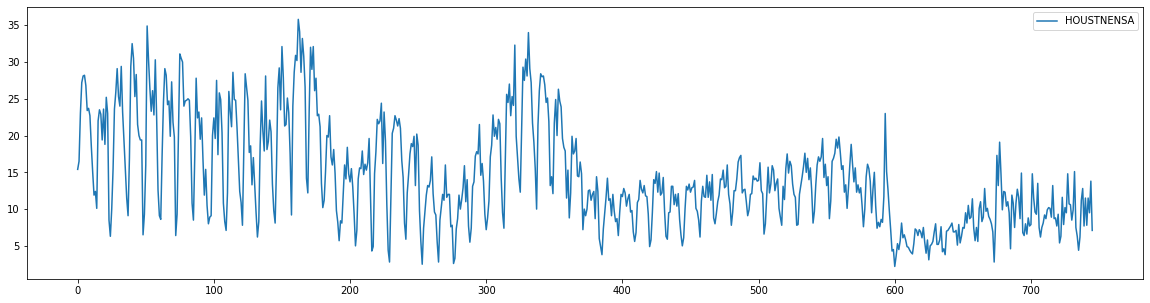

In [60]:
casa.plot(figsize=(20,5));

Convertendo a base de dados para série temporal.

In [61]:
casa = pd.DataFrame(data=casa['HOUSTNENSA'].values,
                    index=pd.date_range(start=datetime(1959,1,1), 
                                        end = datetime(2021,2,1), freq='MS'), 
                    columns=['HOUSTNENSA'])

Plotando novamente a série.

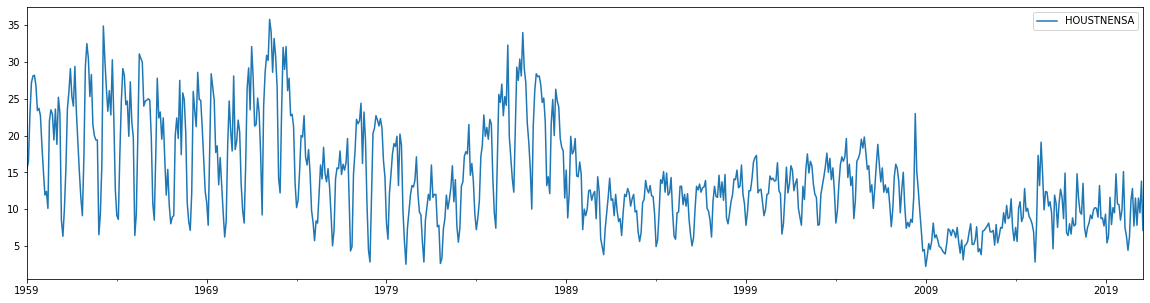

In [62]:
casa.plot(figsize=(20,5))

## Decomposição da séries com *seasonal_decompose*

Primeiro irei decompor a série na forma aditiva, consideram que a série temporal é a soma dos componentes tendência ($T_t$), sazonalidade ($S_t$) e erro ($e_t$):

$Y_t = T_t  + S_t + e_t$

Espera-se que após a decomposição os erros flutuem em torno de zero.

Decompondo a série.

In [63]:
decom1 = seasonal_decompose(casa)

Plotando os componentes da série.

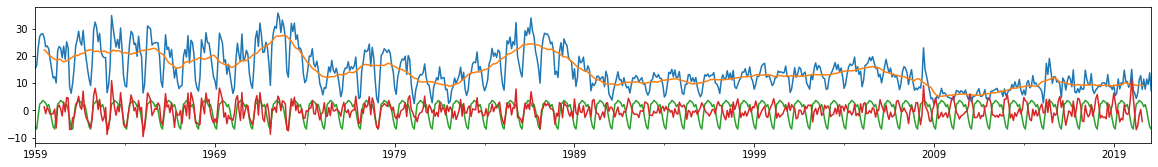

In [64]:
#série observada
decom1.observed.plot(figsize=(20,10))
#tendência da série
decom1.trend.plot(figsize=(20,2.5))
#sazonalidade da série
decom1.seasonal.plot(figsize=(20,2.5))
#resíduos ou erros da série
decom1.resid.plot(figsize=(20,2.5));

Agora irei decompor a série na forma multiplicativa, consideram que a série temporal é o produto dos componentes tendência ($T_t$), sazonalidade ($S_t$) e erro ($e_t$):

$Y_t = T_t \cdot S_t \cdot e_t$

Espera-se que após a decomposição os erros flutuem em torno de um.

Decompondo a série.

In [65]:
decom2 = seasonal_decompose(casa, model='multiplicative')

Plotando os componentes da série.

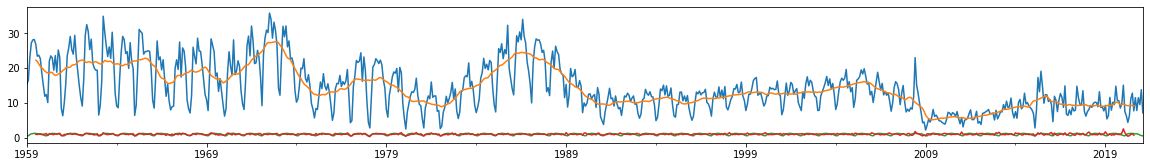

In [66]:
#série observada
decom2.observed.plot(figsize=(20,2.5))
#tendência da série
decom2.trend.plot(figsize=(20,2.5))
#sazonalidade da série
decom2.seasonal.plot(figsize=(20,2.5))
#resíduos ou erros da série
decom2.resid.plot(figsize=(20,2.5));

## Decomposição com *STL*

A **Suavização de gráfico de dispersão estimada localmente** gera uma decomposição semelhante ao que foi feito anteriormente, decompondo a série em tendência, sazonalidade e resíduo. A forma de cálculo é diferente, sendo a série observada uma composição da tendência subtraída da sazonalidade e dos resíduos:

$Y_t = T_t - S_t - e_t$

Treinando o modelo.

In [73]:
stl=STL(casa).fit()

Plotando os resultados.

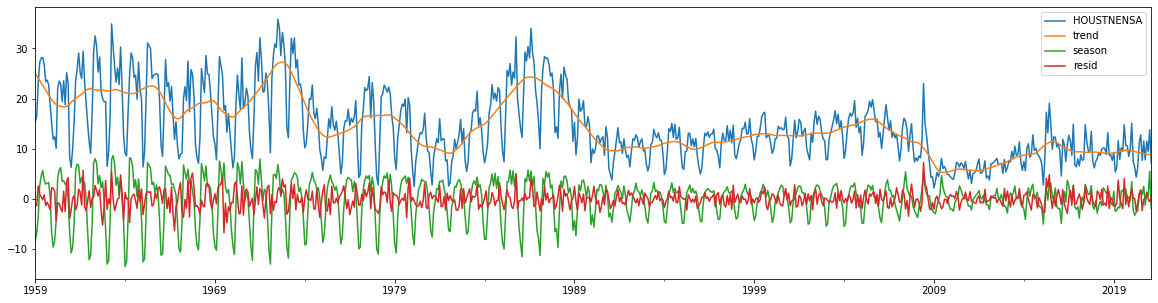

In [77]:
stl.observed.plot(figsize=(20,5), legend=True)
stl.trend.plot(figsize=(20,5), legend=True)
stl.seasonal.plot(figsize=(20,5), legend=True)
stl.resid.plot(figsize=(20,5), legend=True);

###Comparando os resultados

Na tendência da série praticamente há diferença bem insignificantes. Notar que a tendência do método de decomposição sazonal inicia-se períodos após alguns períodos da série observada e termina alguns períodos antes, enquanto no método *STL* inicia-se e termina conforme a série observada.

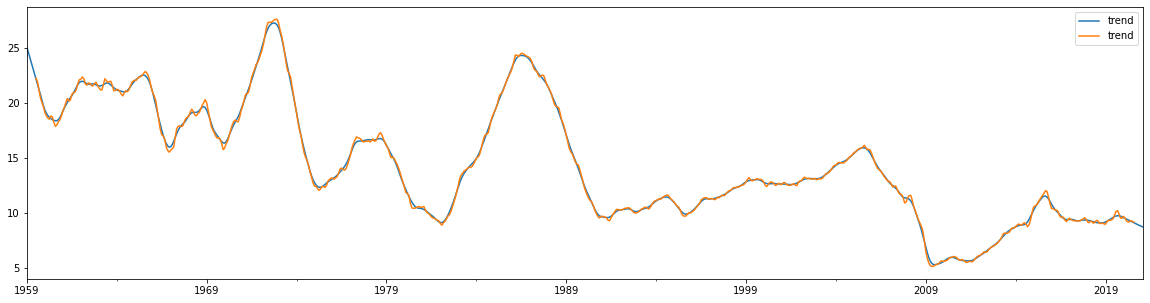

In [91]:
stl.trend.plot(figsize=(20,5), legend=True)
decom1.trend.plot(figsize=(20,5), legend=True)
decom2.trend.plot(figsize=(20,5), legend=True);

A sazonalidade do método *STL* é mais irregular que dos outros métodos.

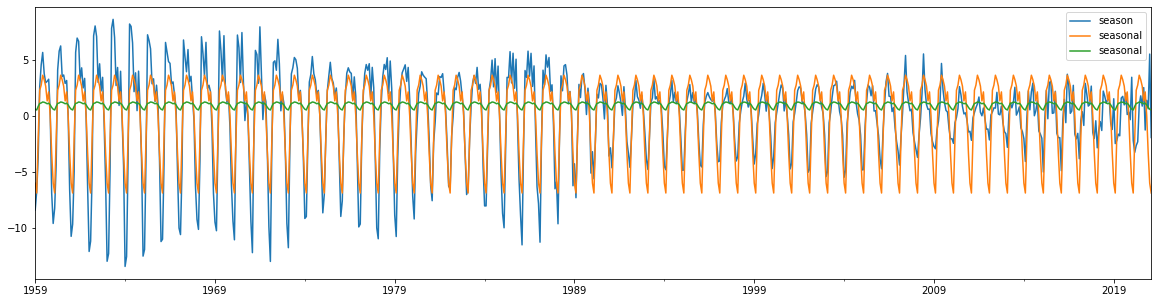

In [87]:
stl.seasonal.plot(figsize=(20,5), legend=True)
decom1.seasonal.plot(figsize=(20,5), legend=True)
decom2.seasonal.plot(figsize=(20,5), legend=True);

Já aqui percebe-se que os resíduos do métodos de decomposição multiplicativa tem erros mais bem comportados, com uma variância bem menor que dos outros modelos. 

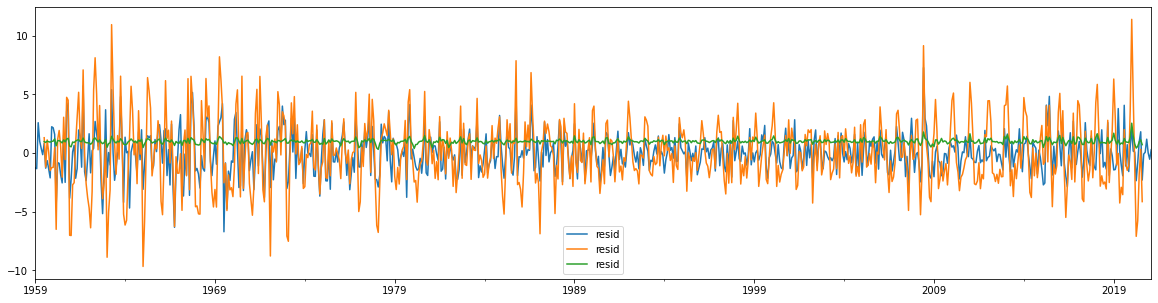

In [88]:
stl.resid.plot(figsize=(20,5), legend=True)
decom1.resid.plot(figsize=(20,5), legend=True)
decom2.resid.plot(figsize=(20,5), legend=True);

## Filtro *Baxter-King*

Esse filtro gera apenas o ciclo da série.

Decompondo a série.

In [92]:
ciclo1 = bkfilter(casa)

Plotando o componente cíclico.

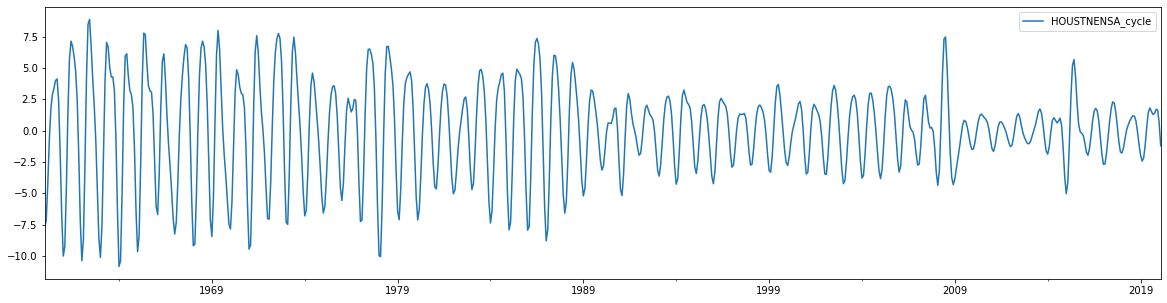

In [93]:
ciclo1.plot(figsize=(20,5));

## Filtro *Christiano Fitzgerald*

Esse método de decomposição considera que a séries temporal é composta por dois componentes apenas : o clico e tendência.

A forma de cálculo é:

$Y_t = c_t + T_t$

In [96]:
ciclo2, tendencia2 = cffilter(casa)

Plotando os dois componentes.

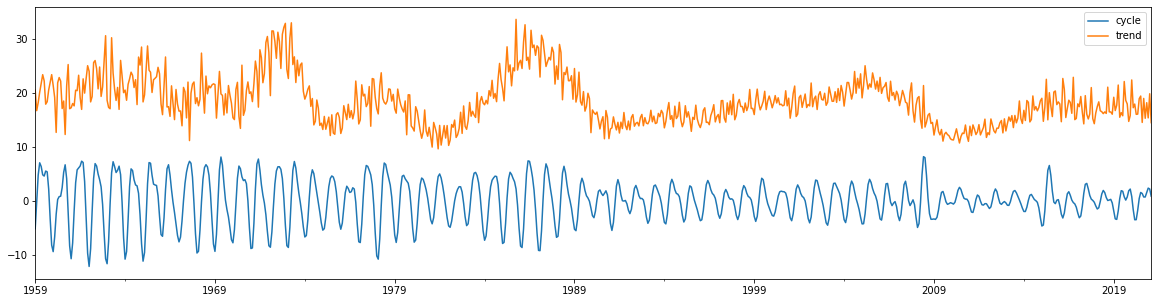

In [97]:
ciclo2.plot(figsize=(20,5), legend=True)
tendencia2.plot(figsize=(20,5), legend=True);

## Filtro *Hodrick-Prescott*

Esse filtro também decompõe a série em tendência e ciclo.

In [98]:
ciclo3, tendencia3 = hpfilter(casa)

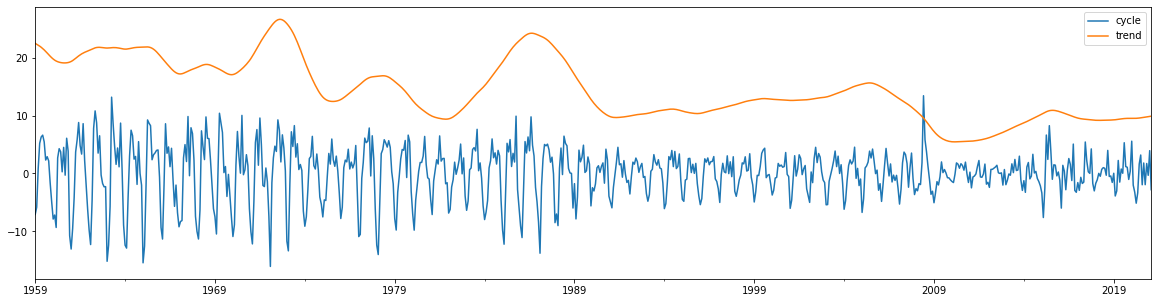

In [99]:
ciclo3.plot(figsize=(20,5), legend=True)
tendencia3.plot(figsize=(20,5), legend=True);

### Comparando os resultados dos filtros

Abaixo o gráfico dos ciclos gerados por cada filtro e nota-se que não há muita diferença entre eles.

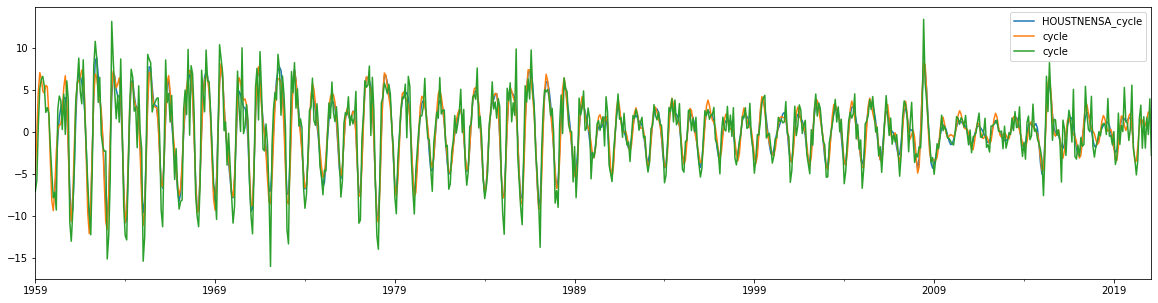

In [103]:
ciclo1.plot(figsize=(20,5), legend=True)
ciclo2.plot(legend=True)
ciclo3.plot(legend=True);

Já a tendência entre os filtros *Christiano Fitzgerald* (de azul) e *Hodrick-Prescott* (de laranja) são bastante diferentes.

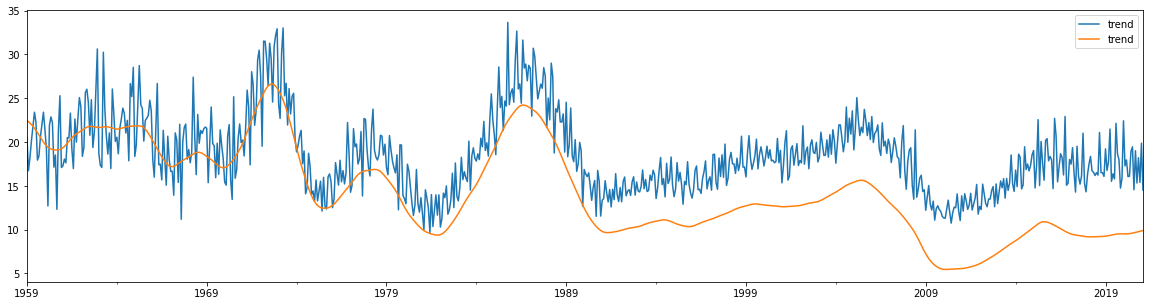

In [104]:
tendencia2.plot(figsize=(20,5), legend=True)
tendencia3.plot(figsize=(20,5), legend=True);

## Conclusão

Nesse *script* visei apenas utilizar os métodos que são usados para decomposição de séries temporais em outras séries. Aparentemente não existem outras bibliotecas além da *Statsmodels* que forneçam ferramentas em *python* para decomposição, mas, caso existam, outros *scripts* serão desenvolvidos.